<a href="https://colab.research.google.com/github/KantiCodes/tech-sessions/blob/main/tech_session_intro_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a notebook for a tech-session talk that took place 13.01.201**  
**The recording of this workshop should be available using the link below**
https://www.youtube.com/watch?v=A8fFJkaTSUw&ab_channel=GDGTechSessions  

**_If you don't see it live you can ignore the rest of this cell :)_**

**Quick announcement**
- If at any point you got confused/stuck, please feel free to either raise your voice or write in chat(I`ll try to watch the chat - if not just tell me to do so :D)
- If you are not stuck but have additional question, please hold with it as we will have Q&A session at the end 

# Agenda for today
- Machine learning K.I.S.S
- Data types (labeled/unlabeled)
- Supervised vs Unsupervised machine learning methods
- Examples using [Sklearn](https://scikit-learn.org/stable/)
- Overfitting/Underfitting example and explanantion using logistic regression and linear regression *
- Test set / Train set separation what is that for? *

 Elements marked with * might be a bit hard to grasp at the begining so don't worry :)


**Machine learning K.I.S.S (In my own words)**
- data (health records of patients)
- task (cancer classification)
- error/punishment (incorrectly classified samples)
- learning (optimization of the algorithm)
- validation/testing (making sure the algorithm work)

# Requirements
pandas
python 3.6+  
jupyter notebook  
sklearn  
matplotlib


In [1]:
import pandas as pd

# Data in machine learning:

**A sample is a single row of data in our data set.**

In [2]:
# Define a list of dictionaries describing a person
people = [
    {'full_name' : 'Bartosz Lachowicz', 'age' : 22, 'country' : 'Poland'},
    {'full_name' : 'John doe', 'age' : 62, 'country' : 'USA'},
    {'full_name' : 'Max Min', 'age' : 5, 'country' : 'Brazil'},
]

# Create a dataframe using the list of people
df = pd.DataFrame(data=people)
df

,full_name,age,country
0,Bartosz Lachowicz,22,Poland
1,John doe,62,USA
2,Max Min,5,Brazil


#1) In machine learning problems we distinguish 2 types of data:  
**Labeled data** - here [wikipedia](https://en.wikipedia.org/wiki/Labeled_data) gives a really good explanantion: "Labeled data is a group of samples that have been tagged with one or more labels. Labeling typically takes a set of unlabeled data and augments each piece of it with informative tags. For example, a data label might indicate whether a photo contains a horse or a cow".  
* **The features** are the columns describing specific sample. Label is the tag(can be a both continious value(500,99$) and a discrete value("cat","dog" - members of finite set) that has been assigned to the sample based on features.  


In [3]:
# Define a list of dictionaries describing a person
labeled_people = [
    {'full_name' : 'Bartosz Lachowicz', 'hours_slept' : 12, 'sleep_needed' : 7, 'condition': 'bad'},
    {'full_name' : 'John doe', 'hours_slept' : 6, 'sleep_needed' : 6, 'condition': 'good'},
    {'full_name' : 'Max Min', 'hours_slept' : 6, 'sleep_needed' : 8, 'condition': 'bad'},
]

# Create a dataframe using the list of people
df = pd.DataFrame(data=labeled_people)
df

,full_name,hours_slept,sleep_needed,condition
0,Bartosz Lachowicz,12,7,bad
1,John doe,6,6,good
2,Max Min,6,8,bad


**Unlabeled data** - contrary to the labeled data, here we only have the features describing a sample. The tags are not pre-assigned but instead the algorithm we are using, is going to come up with reasonable clusters of the data.
Examples: **audio file, video**

In [4]:
# Define a list of dictionaries describing a person
unlabeled_people = [
    {'full_name' : 'Bartosz Lachowicz', 'hours_slept' : 12, 'sleep_needed': 7},
    {'full_name' : 'John doe', 'hours_slept' : 6, 'sleep_needed' : 6},
    {'full_name' : 'Max Min', 'hours_slept' : 6, 'sleep_needed' : 8},
]

# Create a dataframe using the list of people
df = pd.DataFrame(data=unlabeled_people)
df

,full_name,hours_slept,sleep_needed
0,Bartosz Lachowicz,12,7
1,John doe,6,6
2,Max Min,6,8


###Cancer patients labeled vs unlabeled data

<img src="https://i.stack.imgur.com/4WE6N.png" width="550" height="200"/>
<img src="https://i.stack.imgur.com/xqnJr.png" width="550" height="200"/>

source: [Coursera: Machine learning with Python](https://www.coursera.org/lecture/machine-learning-with-python/supervised-vs-unsupervised-jgzpX)

edited by: https://stackoverflow.com/users/5986541/nava-bogatee

#2) Supervised Learning
Supervised learning - deals with labeled. Having input data ***_X_*** and some output data ***_Y_***, we want to find parameters ***_θ_*** of the function ***_f_*** such that ***_X_ *  _θ_ ≈ _f_***

There are two types of supervised learning:
- classification (could be the famous [titanic survival classification](https://www.kaggle.com/c/titanic))
- regression ([house price prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques))  
Algortithm uses the data set to learn how location, size, number of rooms impact the price of the house. Afterwards it can be used to predict unknown price of the house using its features(size, location, number of rooms etc.)

**continious values [1, 1.05, 2, 166, 0.12 etc.]**  
**discrete values [good, bad] or [cat, dog, mice]**

In [5]:
!wget -q https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
df_train = pd.read_csv('house_prices_train.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#3) Unsupervised learning
Unsupervised learning - deals with unlabeled data. This technique determines similarities/patterns between certain samples and then clusters simmilar samples together.  
***Example:*** Song recommendation system based on liked songs- to make a recommendation algorithm would first determine a cluster to which an user belong. Then the algorithm would use favorite songs of different users from that cluster as recommendations.

**Intuition for GIF below:**  
We have a lot of spotify users and data about the songs the listen too  
Algorithm tries to group the users based on the song they like.  
After the algorithm is done we can look at each of the clusters and derive some informartion E.G:
- people on red cluster listen to Metal bands
- yellow clusters listens to everything
- blue cluster are pop lovers

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="400" height="400"/>

[source - wikimedia](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)

#4 Machine learning in practice - introduction

Let's define some data

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2)  # setting the RNG so that we all have the same results

X = np.arange(0,10*4, 1)
B = 5
y_generic = 2.*X + 5
y = y_generic + np.random.normal(2, 4, len(y_generic))  #add a small random number to the y so that function y=2x have some inner noise

df = pd.DataFrame()
df['Feature_X'] = X
df['Target_Variable'] = y
df.head(10)


,Feature_X,Target_Variable
0,0,5.332969
1,1,8.774933
2,2,2.455216
3,3,19.561083
4,4,7.826258
5,5,13.633011
6,6,21.011526
7,7,16.018848
8,8,18.768191
9,9,21.363970


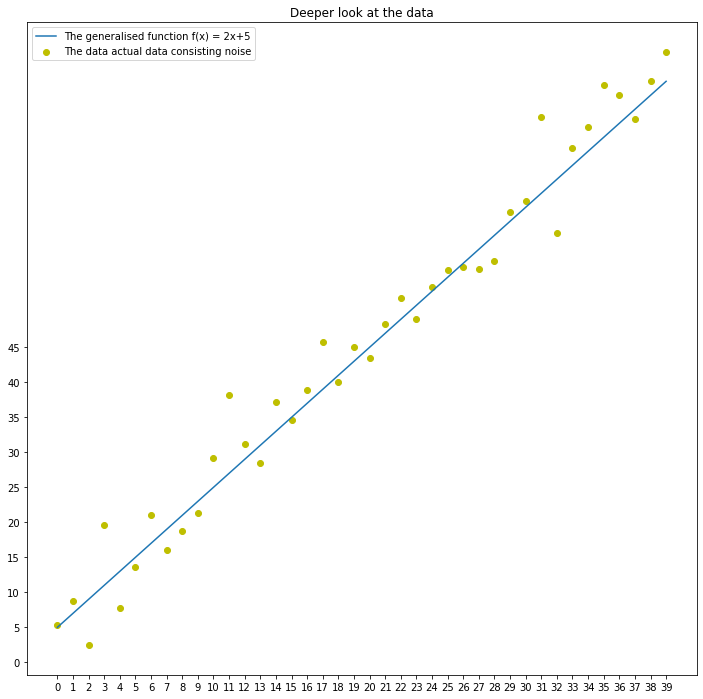

In [7]:
# Create a figure
plt.figure(figsize=(12,12))
plt.plot(X,y_generic, label='The generalised function f(x) = 2x+5')
plt.xticks(range(0,40))
plt.yticks(np.arange(0,50,5))
plt.scatter(X,y, label ='The data actual data consisting noise' , c ='y')
plt.title('Deeper look at the data')
plt.legend()
plt.show()

**Noise of the data is the level to which it is random**

* **The yellow points are the actual data we have**  
* **The blue of is the function best generalising our data**  
* **Why are they different?**
- to imitate the real life scenario where our data consist of some randomness.
    
**Example:**  
When buying a house worth 300k dollars you paid for it 302k cause you really liked the onwer.  
Let us say that I am buying a house worth 100k and I paid for it 97k.   
Your +2k and mine -3k are the "noise" of the data. No matter the noice the houses where worth respectively 300k and 100k, therefore it is desired that the function describing the house worth should still output 300k and 100k which were the actual prices of the houses not influenced by noise

# 5. Overfitting/Underfitting
![](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvNoby-llz4QzAK15nL%2Fimage.png?alt=media&token=41720ce9-bb66-4419-9bd8-640abf1fc415)  
Source: Sagar Sharma / Towards Data Science

**Overfitting - learning the noise of the data**  
**Optimum - learning a function that is close to the real function**  
**Underfitting - learning a function that is far off the real function**  

# 6. Test set/ Train set separation
**When developing machine learning algorithms we should train the using some part of data and then use another(typically smaller) part of that data to test it**

**Question: Why?**
- Most of the machine learning algorithms work more or less like this: Take some data, try to build a model that has the lowest error for this data, return this model

**Now if we check if this model gives good predictions for our data training it on entire data set, it is probably going to do a good job**
- But does it really make sense to validate our model on the data we used to train when its job was to minimize the error for that particular set of data?

**What we should do instead when testing our model is to test it on previously unknown data, this actually gives us good representation of how good the model is (as machine learning is generalny about predicting stuff)**

#7) Linear regression intro

**Let's divide our data into train set and test set using sklearn library**

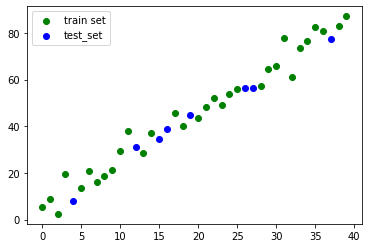

In [8]:
from sklearn.model_selection import train_test_split  # import 3rd part library
X_train, X_test, y_train, y_test = train_test_split(
        X[:,None], y, test_size=0.2, random_state=42)  # Split the data into Train(80%) and Test set(20%)
plt.scatter(X_train, y_train, label='train set', c='g')
plt.scatter(X_test, y_test, label='test_set', c='b')
plt.legend()

#8) Linear regression in action
- predictor for regression problems (contionous variables; house prices etc.)
- first we are going to initialize new LinerRegression model using 3d part library (sklearn)
- then we are going to feed the training data to our model
- after that we are able to use our test set to predict y

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()  # create the model
model.fit(X_train,y_train)  # train it using train data

predicted_y_train = model.predict(X_train)  # Plot predictions using train set values

predicted_y_test = model.predict(X_test)  # Plot prediction using test set values (typically more important for validation than the one above)

b  = model.intercept_  # get the intercept (base value of the function)
w = model.coef_.T  # get the coeficient of the function

print (f'the Function looks like y={w[0]}x + {b}')
#Anything below just ignore, it's plotting

the Function looks like y=2.0516220184683425x + 5.577115513453947


#8) Ploting the results

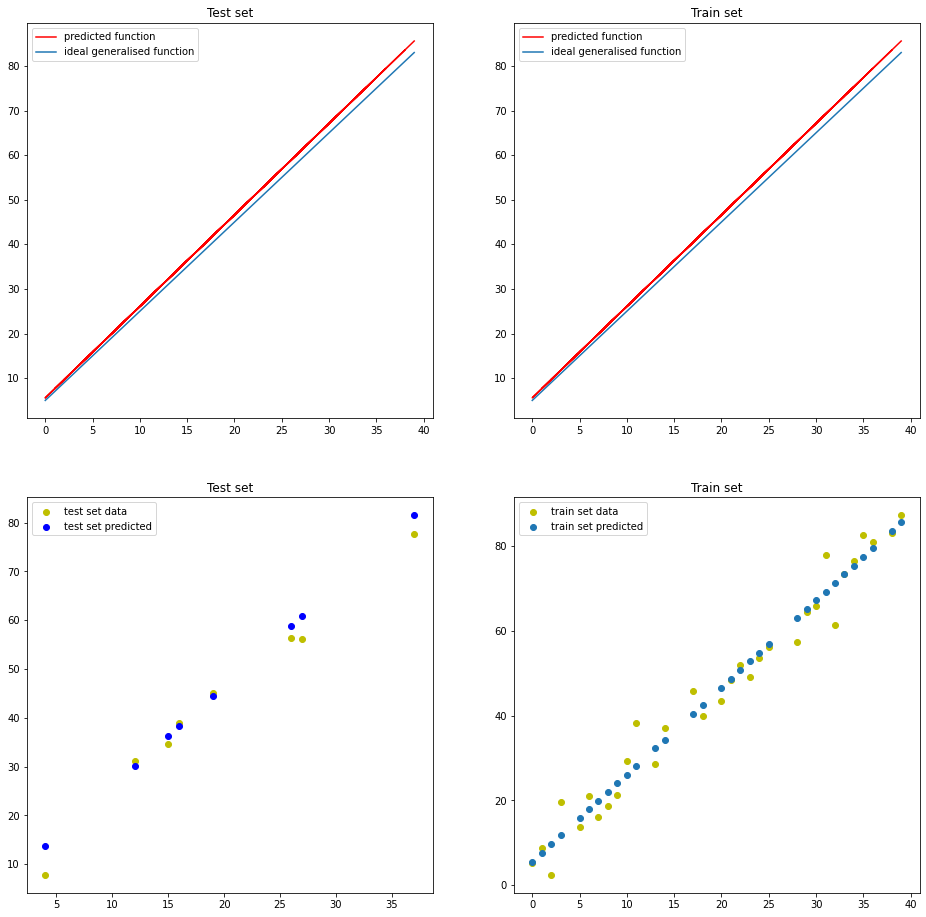

In [11]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(16)
fig.set_figwidth(16)
axs[0,0].plot(X_train,(b+w*X_train), label='predicted function', c='r')  # plot the predicted function
axs[0,0].plot(X,y_generic, label='ideal generalised function')
axs[0,0].set_title('Test set')
axs[0,0].legend()

axs[1,0].scatter(X_test, y_test, label='test set data', c='y')
axs[1,0].scatter(X_test, predicted_y_test, label='test set predicted', c='b')

axs[1,0].set_title('Test set')
axs[1,0].legend()

axs[0,1].plot(X_train,(b+w*X_train), label='predicted function', c='r')  # plot the predicted function
axs[0,1].plot(X,y_generic, label='ideal generalised function')
axs[0,1].set_title('Train set')
axs[0,1].legend()

axs[1,1].scatter(X_train,y_train, label='train set data', c='y')
axs[1,1].scatter(X_train, predicted_y_train, label ='train set predicted' )
# axs[1,1].plot(X_train,(b+w*X_train), label='predicted function', c='r')
axs[1,1].set_title('Train set')
axs[1,1].legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
print(f' f(x) ={b} + {w[0]}x')
print(f'The test set score of this model is {model.score(X_test,y_test)}%')
print(f'test set mean error of this model is {math.sqrt(mean_squared_error(predicted_y_test,y_test))} per sample')

 f(x) =5.577115513453947 + 2.0516220184683425x
The test set score of this model is 0.9724432691479834%
test set mean error of this model is 3.2261736275196085 per sample


#9) Question to the audience :D
- What was the previous type of supervised learning?  
a)regression - continous variables  
b)classification distinct classes  

#10) Supervised learning - classification
This time we are going to classify samples based on the features  
Below I am going to create a sligtly more complicated dataset(non-linearly distributed)

### Let's get some more complicated data

[]

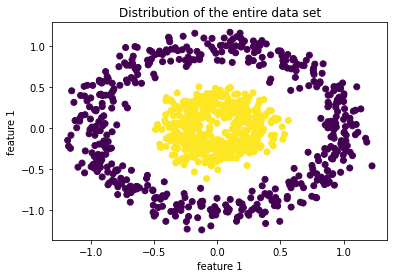

In [13]:
from sklearn.datasets import make_circles
data, labels = make_circles(n_samples=1000, 
                               shuffle=True, noise=0.1, random_state=15, factor=0.3)  # create some data in a circle

plt.scatter(data[:,0], data[:,1], c=labels)
plt.xlabel('feature 1')
plt.ylabel('feature 1')
plt.title("Distribution of the entire data set")
plt.plot()

In [14]:
df = pd.DataFrame(data=data, columns=['feature_1','feature_2'])
df['labels'] = labels
df.head()

,feature_1,feature_2,labels
0,-0.041554,-0.244563,1
1,-0.118578,-0.944480,0
2,1.029788,-0.212129,0
3,0.025093,0.460791,1
4,0.859062,0.477552,0


### Same like last time split into train and test set

In [15]:
data_train, data_test, labels_train, labels_test = train_test_split(
        data, labels, test_size=0.2, random_state=42)



###Let's plot the dataset

No handles with labels found to put in legend.


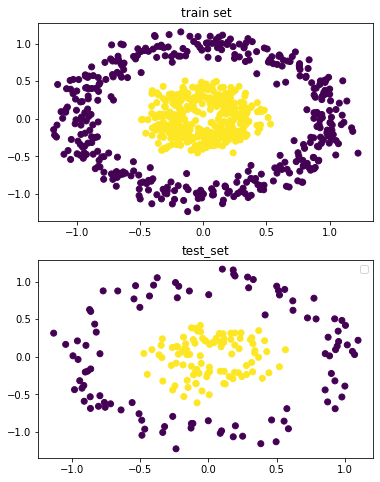

In [16]:
X_train = data_train[:,0]
X_test = data_test[:,0]
     
y_train = data_train[:,1]
y_test = data_test[:,1]                  

fig, axs = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(6)
axs[0].scatter(X_train, y_train, c=labels_train)
axs[0].set_title('train set')
axs[1].scatter(X_test, y_test, c=labels_test)
axs[1].set_title('test_set')
axs[1].legend()


#11) Logistic regression
- uses very similar logic as linear regression
- is used for classification (discrete values [cat, dog], [bad, netural, good], [0, 1])
- Logistic regression returns a class to which it has classified sample
- Logistic regression is also able to provide us with insight in the probability for each of the classes (70% sample

In [17]:
from sklearn.linear_model import LogisticRegression as LR

simple_model = LR().fit(data_train, labels_train)

y_test_pred = simple_model.predict(data_test)
y_train_pred = simple_model.predict(data_train)


**Plot results for train set**

Text(0.5, 1.0, 'Train set prediction')

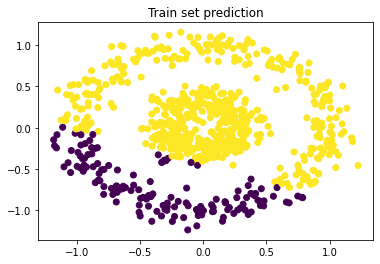

In [18]:
plt.scatter(data_train[:,0], data_train[:,1], c=y_train_pred)
plt.title('Train set prediction')

**Plot results for test set**

Text(0.5, 1.0, 'Test set prediction')

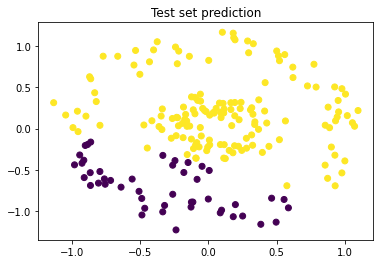

In [19]:
plt.scatter(data_test[:,0], data_test[:,1], c=y_test_pred)
plt.title('Test set prediction')

As mentioned previously we can take a look at probability  
We can see that the probability for both of the classes is around 50% which basicly mean that we can get similar model by tossing a coin  
**That is not a good model!**  


In [20]:
# Let's take a look at first 10 samples and see what are the probabilities for each of the classes
simple_model.predict_proba(data_test)[0:10]

array([[0.49136418, 0.50863582],
       [0.49397373, 0.50602627],
       [0.5010778 , 0.4989222 ],
       [0.49909062, 0.50090938],
       [0.50289448, 0.49710552],
       [0.49294977, 0.50705023],
       [0.50392081, 0.49607919],
       [0.49835226, 0.50164774],
       [0.50269541, 0.49730459],
       [0.49568191, 0.50431809]])

In [21]:
test_score = simple_model.score(data_test, labels_test)
print(f'Test set score for the logistic regression: {test_score}')
train_score = simple_model.score(data_train, labels_train)
print(f'Train set score for the logistic regression: {train_score}')

Test set score for the logistic regression: 0.645
Train set score for the logistic regression: 0.6625


#12) Feature Engineering
What we can do when our model is underperforming (underfitting) is that we can increase it's complexity.
**a function y=ax+b cannot recognize non-linear shape**
Well what can we do?
- One way to go would be to collect new data and try to investigate more
- what we can also do is to create polynomial features using **feature_1<sup>2<sup>** and **feature_2<sup>2<sup>**

**Let's add new features**  
feature_3 = feature_1<sup>2<sup>

feature_4 = feature_2<sup>2<sup>

In [22]:
data_square = np.square(data)
complex_data = np.column_stack([data, data_square])
df = pd.DataFrame(data=complex_data, columns=['f1','f2','f3(f1^2)','f4(f2^2)'])
df.head()

,f1,f2,f3(f1^2),f4(f2^2)
0,-0.041554,-0.244563,0.001727,0.059811
1,-0.118578,-0.944480,0.014061,0.892043
2,1.029788,-0.212129,1.060464,0.044999
3,0.025093,0.460791,0.000630,0.212329
4,0.859062,0.477552,0.737988,0.228056


In [23]:
-0.041554	* -0.041554	

0.001726734916

In [24]:
data_train, data_test, labels_train, labels_test = train_test_split(
        complex_data, labels, test_size=0.2, random_state=42)



**Logistic Regression with complex data**

In [25]:
complex_model = LR().fit(data_train, labels_train)
y_pred = complex_model.predict(data_test)
y_test_train = complex_model.predict(data_train)


**train set classification**

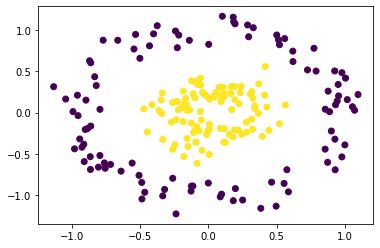

In [26]:
plt.scatter(data_test[:,0], data_test[:,1], c=y_pred)

In [27]:
test_score = complex_model.score(data_test, labels_test)
print(f'Test set score for the logistic regression: {test_score}')
train_score = complex_model.score(data_train, labels_train)
print(f'Train set score for the logistic regression: {train_score}')

Test set score for the logistic regression: 0.995
Train set score for the logistic regression: 1.0


### WoW! Amazing, we manage to create a Balanced model